In [1]:
import subprocess 
import json

p = subprocess.Popen("bitcoin-cli getpeerinfo", shell=True, stdout=subprocess.PIPE)
output = p.stdout.read()
result = json.loads(output)


In [2]:
print ("Peer Info Length = " ,len(result))
print ("\n List of Keys :")
for key, value in result[0].items():
    print (key, "| " , end='')
print ("\r\n---------------------------------------------------------------------------------------------")


print('{:<6}{:22}{:<7}{:<11}{:<13}{:<5}{:<5}{:<10}{:<5}{:<10}{:<5}'
          .format("id","addr","sent","recv","ping","in",
                  "node","starting","ban","synced-h","synced_b"))
for i in result:
    try:
        print('{:<6}{:22}{:<7}{:<11}{:<13}{:<5}{:<5}{:<10}{:<5}{:<10}{:<5}'
              .format(i["id"],i["addr"],i["bytessent"],i["bytesrecv"],i["pingtime"],i["inbound"],
                      i["addnode"],i["startingheight"],i["banscore"],i["synced_headers"],i["synced_blocks"]))
    except:
        print('{:<6}{:22}{:<7}{:<11}{:<13}{:<5}{:<5}{:<10}{:<5}{:<10}{:<5}'
              .format(i["id"],i["addr"],i["bytessent"],i["bytesrecv"],"NA",i["inbound"],
                      i["addnode"],i["startingheight"],"NA","NA","NA"))
        

Peer Info Length =  24

 List of Keys :
id | addr | addrlocal | addrbind | services | relaytxes | lastsend | lastrecv | bytessent | bytesrecv | conntime | timeoffset | pingtime | minping | version | subver | inbound | addnode | startingheight | banscore | synced_headers | synced_blocks | inflight | whitelisted | bytessent_per_msg | bytesrecv_per_msg | 
---------------------------------------------------------------------------------------------
id    addr                  sent   recv       ping         in   node starting  ban  synced-h  synced_b
17    203.158.118.8:8333    714688990769396   0.206269     0    0    512980    0    513182    513182
33    73.252.227.11:8333    682716160289735   0.217911     0    0    512980    0    513182    513182
60    80.101.32.121:8333    86896699560205    0.041286     0    0    512983    0    513180    513180
74    208.110.73.107:8333   598589323798946   0.116786     0    0    512983    0    513180    513180
77    216.157.21.35:8333    754014726707490 

In [3]:
import pandas as pd
df = pd.DataFrame.from_dict(result, orient='columns')
print (len(df))
df.head()

24


,addnode,addr,addrbind,addrlocal,banscore,bytesrecv,bytesrecv_per_msg,bytessent,bytessent_per_msg,conntime,...,pingtime,relaytxes,services,startingheight,subver,synced_blocks,synced_headers,timeoffset,version,whitelisted
0,False,203.158.118.8:8333,178.162.214.41:38082,178.162.214.41:38082,0,90769396,"{'addr': 70062, 'block': 60982075, 'blocktxn':...",7146889,"{'addr': 43500, 'feefilter': 32, 'getaddr': 24...",1520750570,...,0.206269,True,000000000000000d,512980,/Satoshi:0.15.0.1/,513182,513182,-8,70015,False
1,False,73.252.227.11:8333,178.162.214.41:43650,178.162.214.41:43650,0,60289735,"{'addr': 62307, 'block': 17289771, 'blocktxn':...",6827161,"{'addr': 42410, 'feefilter': 32, 'getaddr': 24...",1520751714,...,0.217911,True,000000000000000d,512980,/Satoshi:0.15.1/,513182,513182,-14,70015,False
2,False,80.101.32.121:8333,178.162.214.41:35324,178.162.214.41:35324,0,9560205,"{'addr': 70042, 'block': 1040390, 'blocktxn': ...",8689669,"{'addr': 41555, 'feefilter': 32, 'getaddr': 24...",1520753434,...,0.041286,True,000000000000000d,512983,/Satoshi:0.14.2/,513180,513180,0,70015,False
3,False,208.110.73.107:8333,178.162.214.41:36010,178.162.214.41:36010,0,23798946,"{'addr': 65807, 'block': 9615423, 'cmpctblock'...",5985893,"{'addr': 41865, 'blocktxn': 230783, 'cmpctbloc...",1520753509,...,0.116786,True,000000000000000d,512983,/Satoshi:0.15.0/,513180,513180,-42,70015,False
4,False,216.157.21.35:8333,178.162.214.41:47860,178.162.214.41:47860,0,26707490,"{'addr': 73707, 'block': 529977, 'blocktxn': 3...",7540147,"{'addr': 40225, 'feefilter': 32, 'getaddr': 24...",1520753525,...,0.118699,True,000000000000040d,512983,/Satoshi:0.16.0/,513182,513182,-27,70015,False


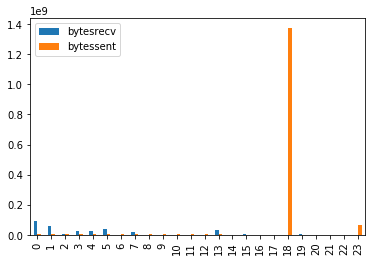

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

df2 = df[["addr","bytesrecv","bytessent"]]
plt.figure()
df2.plot(kind='bar')

In [7]:
df2

,addr,bytesrecv,bytessent
0,203.158.118.8:8333,90769396,7146889
1,73.252.227.11:8333,60289735,6827161
2,80.101.32.121:8333,9560205,8689669
3,208.110.73.107:8333,23798946,5985893
4,216.157.21.35:8333,26707490,7540147
5,109.248.206.13:8333,41551102,6756791
6,129.13.252.47:34804,56944,7737640
7,104.37.61.159:8333,19494398,8246549
8,82.130.103.18:47708,55946,7657168
9,128.235.40.191:31286,138594,7633997


In [135]:
# نمایش اطلاعات جمع آوری شده
import pandas as pd
df = pd.DataFrame.from_dict(result, orient='columns')
df2 = pd.read_csv("peers_db")
df3 = df2.append(df[["addr"]]).drop_duplicates()

# به روز رسانی در فایل
# df3.to_csv("peers_db",index=False)


print(len(df3))
df3.head()

539


,addr
0,178.62.34.210:8333
1,147.32.30.55:8333
2,192.175.59.140:8333
3,45.55.50.102:8333
4,47.90.86.42:8333


In [8]:
import requests
import json
import time
result = json.loads(output)

#https://www.ipinfodb.com
def getcountry(ip):
    KEY = "e52ea3af34144855795d5e70b61ed107064383152ee97feed21d46a1d646180e"
#     url = "http://api.ipinfodb.com/v3/ip-city/?key="+KEY+"&ip="+ip
    url = "http://api.ipinfodb.com/v3/ip-country/?key="+KEY+"&ip="+ip
    country_result = requests.get(url)
    time.sleep(0.5)
    return country_result.text.split(";")[4] + "("+country_result.text.split(";")[3]+")"
#     return country_result.text.split(";")[3]+"-" + ""+country_result.text.split(";")[5]

getcountry("94.50.1.99")

'Russian Federation(RU)'

In [74]:
print('{:<6}{:22}{:25}{:<10}{:<11}{:<13}'
          .format("id","addr","country","sent","recv","ping"))

for i in result:
    try:
        print('{:<6}{:22}{:25}{:<10}{:<11}{:<13}'
              .format(i["id"],i["addr"],getcountry(i["addr"].split(":")[0]),i["bytessent"],i["bytesrecv"],i["pingtime"]))
    except:
        print('{:<6}{:22}{:25}{:<10}{:<11}{:<13}'
              .format(i["id"],i["addr"],getcountry(i["addr"].split(":")[0]),i["bytessent"],i["bytesrecv"],"NA"))
        

id    addr                  country                  sent      recv       ping         
0     178.62.34.210:8333    United Kingdom(GB)       605686    2695521    0.019392     
1     147.32.30.55:8333     Czech Republic(CZ)       759135    1468490    0.008667     
4     192.175.59.140:8333   United States(US)        643255    2014290    0.10401      
7     45.55.50.102:8333     United States(US)        2198597   911667     0.09236      
8     47.90.86.42:8333      Hong Kong(HK)            673302    1376066    0.225155     
9     173.249.31.158:8333   Germany(DE)              3298133   2265735    0.565764     
10    159.65.143.25:8333    Singapore(SG)            980001    1216226    0.168616     
13    82.130.103.18:57276   Switzerland(CH)          666463    3466       0.021282     
17    136.243.139.120:42665 Germany(DE)              655355    7642       0.005898     
20    128.235.40.191:40266  United States(US)        651381    8421       0.09164      
28    23.92.36.2:64501      Unit